# MNIST Classification using Shallow Neural Networks

Import necessary packages and loading mnist dataset from keras inbuilt datasets

In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist, fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.metrics import Accuracy, Precision, Recall, AUC



In [2]:

# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

Visualizing the dataset using matlplotlib

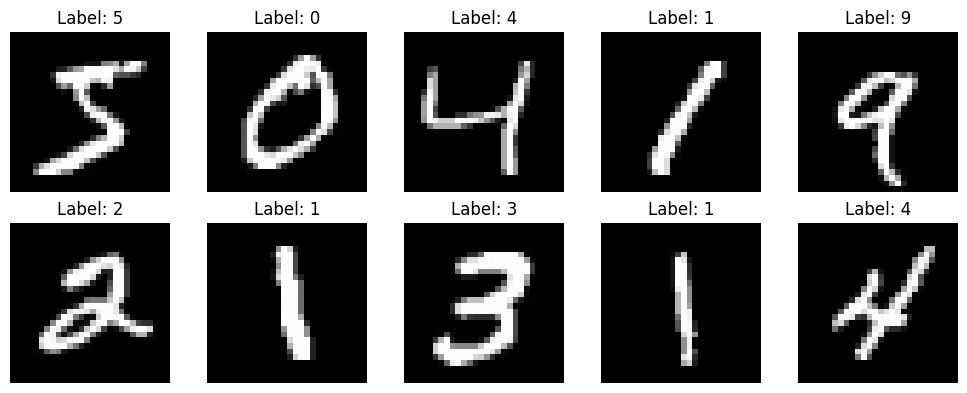

In [3]:
import matplotlib.pyplot as plt

# Display a few sample images
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(10, 4))

for i, ax in enumerate(axes.flatten()):
    ax.imshow(x_train[i], cmap='gray')
    ax.set_title(f"Label: {y_train[i]}")
    ax.axis('off')

plt.tight_layout()
plt.show()


In [4]:
x_train = x_train/255
x_test = x_test/255

Converting the labels to one-hot encoded vectors to align with the ouput neurons

In [5]:
# Convert the labels to one-hot encoded vectors
y_train = tf.keras.utils.to_categorical(y_train, num_classes=10)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=10)


Building a 3 layer neural network with configurations as follows,
- Layer 1 - Input flattening layer with shape (28, 28)
- Layer 2 - Hidden Layer with 256 neurons with relu activation
- Layer 3 - Output Layer 10 neurons with softmax activation


In [13]:
# Build the model
model = Sequential()
model.add(Flatten(input_shape=(28, 28)))
model.add(Dense(256, activation='sigmoid'))
model.add(Dense(10, activation='softmax'))


Using 'accuracy' metrics for evaluation

In [14]:
metrics = ['accuracy']

Compile the model with 'Adam' optimizer with loss as 'categorical_crossentropy' as we 10 classes.

In [15]:
model.compile(optimizer=tf.optimizers.Adam(), loss='categorical_crossentropy', metrics=metrics)

In [16]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_2 (Dense)             (None, 256)               200960    
                                                                 
 dense_3 (Dense)             (None, 10)                2570      
                                                                 
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________


After multiple observations, We are gonnna fit the model with 20 epochs. Further 20 epochs, model seems to be overfitting.
 
And let's use the batch size as 32.

In [17]:
history = model.fit(x_train, y_train, epochs=20, batch_size=32, validation_data=(x_test, y_test))

Epoch 1/20
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3652 - accuracy: 0.8997 - val_loss: 0.2196 - val_accuracy: 0.9334
Epoch 2/20
1875/1875 [==============================] - 3s 1ms/step - loss: 0.1805 - accuracy: 0.9479 - val_loss: 0.1518 - val_accuracy: 0.9546
Epoch 3/20
1875/1875 [==============================] - 3s 1ms/step - loss: 0.1254 - accuracy: 0.9631 - val_loss: 0.1124 - val_accuracy: 0.9655
Epoch 4/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0916 - accuracy: 0.9736 - val_loss: 0.0944 - val_accuracy: 0.9710
Epoch 5/20
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0710 - accuracy: 0.9792 - val_loss: 0.0776 - val_accuracy: 0.9754
Epoch 6/20
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0553 - accuracy: 0.9835 - val_loss: 0.0778 - val_accuracy: 0.9766
Epoch 7/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0432 - accuracy: 0.9881 - val_loss: 0.0684 - val_accuracy:

Plotting Epochs and Accuracy as a line graph

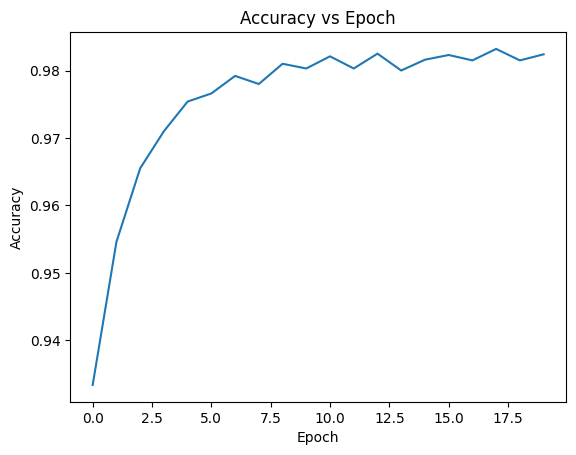

In [18]:
plt.plot(history.epoch, history.history['val_accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Epoch')
plt.show()

Let's create a canvas using Matplotlib where you can draw by clicking and dragging the mouse. Once you're done drawing, press 'Enter' to predict the digit. To clear the canvas, simply press 'C'.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import time

# Set up the drawing canvas
canvas = np.ones((280, 280), dtype=np.uint8) * 255

def predict_digit(image):
    # Preprocess the image for prediction
#     image = cv2.bitwise_not(image)
    image = cv2.resize(image, (28, 28))
    image = image.reshape(1, 28, 28)
    image = image.astype('float32') / 255.0
    

    # Make the prediction using the pre-trained model
    prediction = model.predict(image, verbose=0)
    digit = np.argmax(prediction)

    return digit

def draw(event, x, y, flags, param):
    global canvas, drawing

    if event == cv2.EVENT_LBUTTONDOWN:
        drawing = True
    elif event == cv2.EVENT_LBUTTONUP:
        drawing = False
    elif event == cv2.EVENT_MOUSEMOVE:
        if drawing:
            cv2.circle(canvas, (x, y), 10, (255, 255, 255), -1)

# Set up the window and callback function for mouse events
cv2.namedWindow('Digit Recognition')
cv2.setMouseCallback('Digit Recognition', draw)

canvas = cv2.bitwise_not(canvas)

while True:
    # Display the drawing canvas
    cv2.imshow('Digit Recognition', canvas)
    
    # Reset the drawing canvas when the 'C' key is pressed
    if cv2.waitKey(1) & 0xFF == ord('c'):
        canvas = np.ones((280, 280), dtype=np.uint8) * 255
        canvas = cv2.bitwise_not(canvas)

    # Exit the loop when the 'Esc' key is pressed
    if cv2.waitKey(1) & 0xFF == 27:
        break
    
    if cv2.waitKey(1) & 0xFF == 13:
        # Perform digit recognition
        digit = predict_digit(canvas)
        cv2.putText(canvas, f'Predicted Digit:{digit}', (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2)

cv2.destroyAllWindows()
